In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [16]:
data=pd.read_csv("/media/anurag/HDD 1TB/Anurag/Fraud_data.csv",engine='python', on_bad_lines='skip')

In [97]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,Unnamed: 17,fraudulent,Unnamed: 19
0,16996.0,EXCELLENT ER RN Opportunity Available Now,"US, IL, Urbana",NaN,NaN,NaN,"Our client, located in Urban, IL, is looking f...",NaN,NaN,0.0,1.0,0.0,Full-time,NaN,NaN,Hospital & Health Care,Health Care Provider,NaN,0,NaN
1,9358.0,Scrum Master / Website Development Project Man...,"US, FL, Tampa",NaN,NaN,352 Inc. is a full-service digital agency crea...,Other agencies may call this job “Project Mana...,Qualifications2-10 years of experience in webs...,What You’ll GetFreedom: We trust you to do you...,0.0,1.0,1.0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Project Management,NaN,0,NaN
2,11562.0,HR Assistant - Contract,"AU, NSW, Sydney",People & Culture,NaN,Squiz is one of the world's leading web soluti...,Squiz is an Australian owned and now multinati...,You could be a graduate or have many years of ...,NaN,0.0,1.0,0.0,Contract,Not Applicable,Unspecified,Information Technology and Services,Human Resources,NaN,0,NaN
3,1106.0,Regional Sales Director South Africa,"ZA, GT, Johannesburg",Sales,NaN,Upstream’s mission is to revolutionise the way...,The Regional Sales Director SA will help deriv...,Knowledge/Skills/ExperienceProven sales and ac...,"Includes attractive competitive base salary, c...",0.0,1.0,1.0,Full-time,Director,NaN,Telecommunications,Sales,NaN,0,NaN
4,1981.0,Petrophysicist,"US, OK, Oklahoma City",NaN,NaN,Valor Services provides Workforce Solutions th...,About the CompanyThis is an amazing job opport...,"Education: Bachelor’s degree in Geology, Geoph...","Industry, Location and CompensationIndustry: E...",0.0,1.0,0.0,Full-time,Associate,Bachelor's Degree,Oil & Energy,NaN,NaN,0,NaN


In [17]:
# To check the number of rows and column
data.shape

(357, 18)

In [98]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'Unnamed: 17', 'fraudulent', 'Unnamed: 19'],
      dtype='object')

In [99]:
# let us check the missing values in our dataset

data.isnull().sum()

job_id                 10728
title                  10728
location               10794
department             13000
salary_range           13719
company_profile        11364
description            10728
requirements           11292
benefits               12137
telecommuting          10728
has_company_logo       10728
has_questions          10728
employment_type        11442
required_experience    12103
required_education     12334
industry               11705
function               12014
Unnamed: 17            14304
fraudulent                 0
Unnamed: 19            10728
dtype: int64

In [100]:
# Let us remove the columns which are not necessary
# axis =1 specifies that the values are column value and inplace=true to make these changes permanent (ie. make these dropes of columns permanent in the data set)
# We have droped salary range because 70% approx null value
# also job_id and other irrelvent columns because they does not have any logical meaning
data.drop(['job_id', 'salary_range', 'telecommuting', 'has_company_logo', 'has_questions'],axis=1,inplace = True)

In [101]:
data.shape
data.head()

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,Unnamed: 17,fraudulent,Unnamed: 19
0,EXCELLENT ER RN Opportunity Available Now,"US, IL, Urbana",NaN,NaN,"Our client, located in Urban, IL, is looking f...",NaN,NaN,Full-time,NaN,NaN,Hospital & Health Care,Health Care Provider,NaN,0,NaN
1,Scrum Master / Website Development Project Man...,"US, FL, Tampa",NaN,352 Inc. is a full-service digital agency crea...,Other agencies may call this job “Project Mana...,Qualifications2-10 years of experience in webs...,What You’ll GetFreedom: We trust you to do you...,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Project Management,NaN,0,NaN
2,HR Assistant - Contract,"AU, NSW, Sydney",People & Culture,Squiz is one of the world's leading web soluti...,Squiz is an Australian owned and now multinati...,You could be a graduate or have many years of ...,NaN,Contract,Not Applicable,Unspecified,Information Technology and Services,Human Resources,NaN,0,NaN
3,Regional Sales Director South Africa,"ZA, GT, Johannesburg",Sales,Upstream’s mission is to revolutionise the way...,The Regional Sales Director SA will help deriv...,Knowledge/Skills/ExperienceProven sales and ac...,"Includes attractive competitive base salary, c...",Full-time,Director,NaN,Telecommunications,Sales,NaN,0,NaN
4,Petrophysicist,"US, OK, Oklahoma City",NaN,Valor Services provides Workforce Solutions th...,About the CompanyThis is an amazing job opport...,"Education: Bachelor’s degree in Geology, Geoph...","Industry, Location and CompensationIndustry: E...",Full-time,Associate,Bachelor's Degree,Oil & Energy,NaN,NaN,0,NaN


In [102]:
# Fill NaN values with blank space
# inplace=true to make this change in the dataset permanent
data.fillna(' ', inplace=True)

/tmp/ipykernel_26060/3425733239.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value ' ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna(' ', inplace=True)


In [103]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["fraudulent"]]
# Store the variable we are predicting 
target = "fraudulent"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data["fraudulent"]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X, Y)

df1 = pd.DataFrame(X_res)
  
df3 = pd.DataFrame(y_res)
  
# the default behaviour is join='outer'
# inner join
  
result = pd.concat([df1, df3], axis=1, join='inner')
display(result)
data=result;

(14304, 14)
(14304,)


,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,Unnamed: 17,Unnamed: 19,fraudulent
10716,,,,,,,,,,,,,,,0
14209,,,,,,,,,,,,,,,0
5582,,,,,,,,,,,,,,1.0,0
1245,iOS Developer - Official London Travel App,"GB, LND, London",Software Development,What Now?! is an innovative new app that simul...,ABOUTWhat Now?! is an innovative new app that ...,MINIMUM QUALIFICATIONS User interface developm...,Job type: Full-timeCompensation: Generous and ...,Full-time,Not Applicable,Unspecified,"Leisure, Travel & Tourism",Engineering,,,0
2392,Customer Service Associate - Part Time,"US, CA, Los Angeles",,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,QUALIFICATIONS:Minimum of 6 months customer se...,,Part-time,Entry level,High School or equivalent,Financial Services,Administrative,,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,,,,,,,,,,,,,,,1
14229,,,,,,,,,,,,,,,1
14235,,,,,,,,,,,,,,,1
14261,,,,,,,,,,,,,,,1


In [104]:
data.isnull().sum()
# data cleaning done

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
Unnamed: 17            0
Unnamed: 19            0
fraudulent             0
dtype: int64

# Explaratory Data Analysis

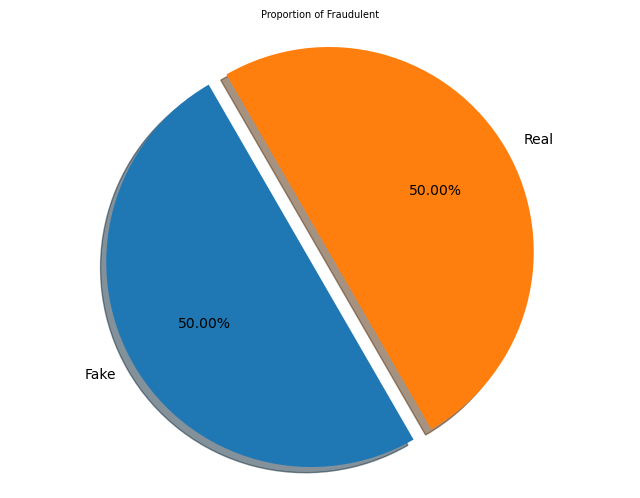

In [105]:
 # Checking for distribution of class label(percentages belonging to real class and percentages belonging to fraud class)
 # in the data 1 indicates fraud post
 # 0 indicating real post
 # Plotting pie chart for the data
 # function of Explode function: how the portion will appear (to understand change explode=(0,0.5))

labels = 'Fake', 'Real'
sizes = [data.fraudulent[data['fraudulent']== 1].count(), data.fraudulent[data['fraudulent']== 0].count()]
explode = (0, 0.1) 
fig1, ax1 = plt.subplots(figsize=(8, 6)) #size of the pie chart
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=120) #autopct %1.2f%% for 2 digit precision
ax1.axis('equal')
plt.title("Proportion of Fraudulent", size = 7)
plt.show()

In [15]:
# we will try to see which country is posting most of the jobs
# Visualize job postings by countries
# we will use the location column for visualizing this data
# In location data is of type (country_name,state,city)
# we neeed to know the country wise data

def split(location):
    l = location.split(',')
    return l[0]

data['country'] = data.location.apply(split)
data['country']

719      US
14150    US
11802    US
4879     US
3227     US
         ..
14207    US
14229    US
14235    US
14261    AU
14279    US
Name: country, Length: 1386, dtype: object

In [16]:
# this will give unique country values
data['country'].nunique()

45

In [17]:
# top 10 country that post jobs 
data['country'].value_counts()[:11]

country
US    990
GB    109
AU     43
GR     43
CA     31
       25
DE     21
IN     13
MY     12
NZ     12
PL      9
Name: count, dtype: int64

Text(0.5, 0, 'Countries')

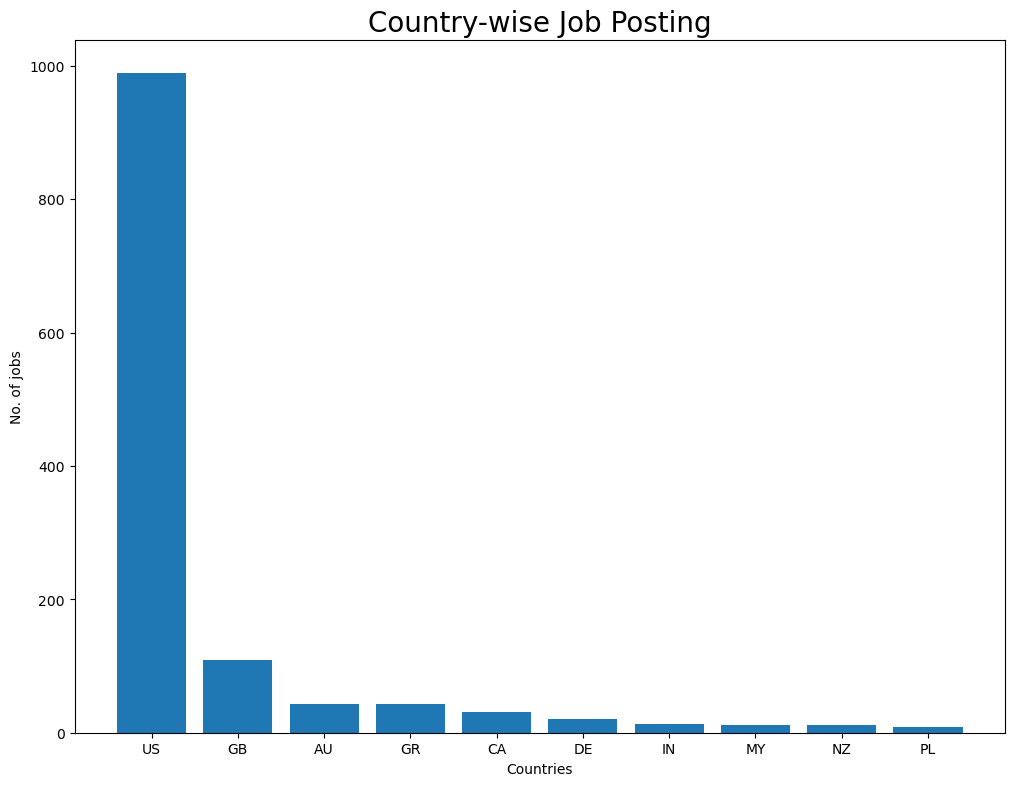

In [18]:
# creating a dictionary(key-value pair) with top 10 country
country = dict(data.country.value_counts()[:11])
del country[' '] #deleting country with space values
plt.figure(figsize=(12,9))
plt.title('Country-wise Job Posting', size=20)
plt.bar(country.keys(), country.values()) #(xaxis,yaxis)
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)

In [19]:
country.keys()

dict_keys(['US', 'GB', 'AU', 'GR', 'CA', 'DE', 'IN', 'MY', 'NZ', 'PL'])

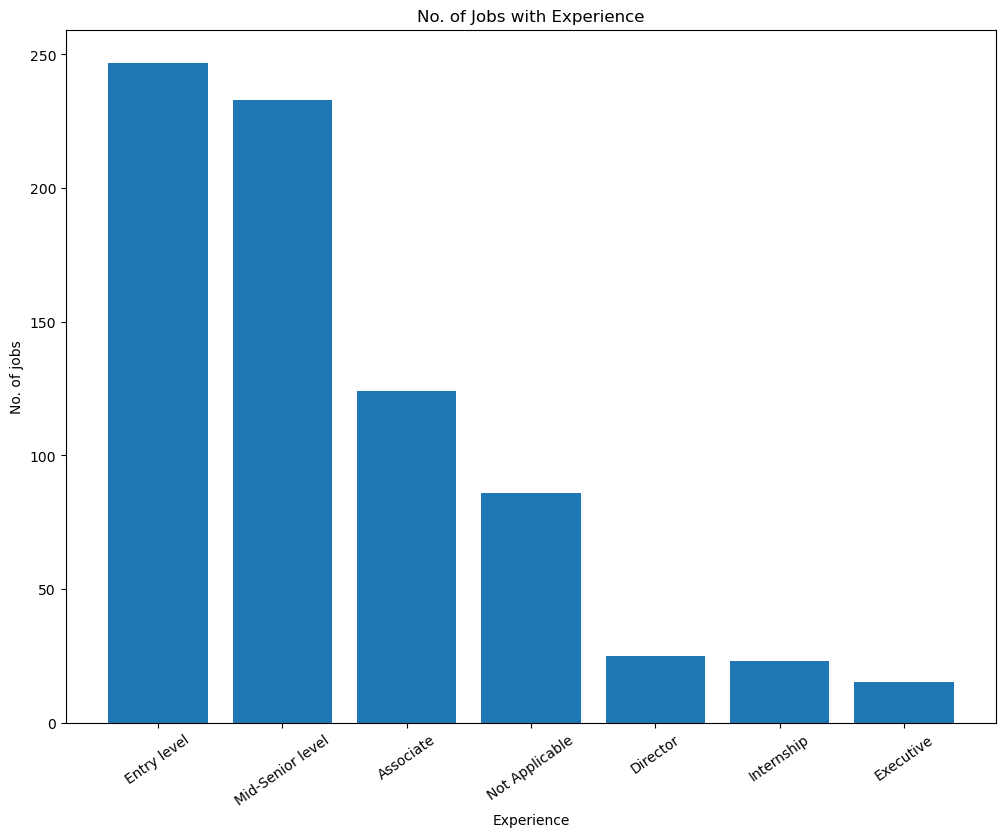

In [20]:
# visualizing jobs based on experience
experience = dict(data.required_experience.value_counts())
del experience[' ']
plt.figure(figsize=(12,9))
plt.bar(experience.keys(), experience.values())
plt.title('No. of Jobs with Experience')
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

In [19]:
# Task: This data is Inbalanced, it contains 95% of real jobs and only 5% fake jobs,but we can make it balance
# Try this out

In [21]:
#Most frequent jobs
print(data.title.value_counts()[:10])

title
Data Entry Admin/Clerical Positions - Work From Home                    17
Cruise Staff Wanted *URGENT*                                            17
Administrative Assistant                                                15
Home Based Payroll Typist/Data Entry Clerks Positions Available         15
English Teacher Abroad                                                  13
Customer Service Representative                                         12
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     10
Network Marketing                                                       10
Data Entry                                                               9
Payroll Clerk                                                            8
Name: count, dtype: int64


In [22]:
#Titles and count of fraudulent jobs
# checking for most fake jobs based on title
print(data[data.fraudulent==1].title.value_counts()[:10])

title
Cruise Staff Wanted *URGENT*                                            17
Data Entry Admin/Clerical Positions - Work From Home                    17
Home Based Payroll Typist/Data Entry Clerks Positions Available         15
Administrative Assistant                                                13
Customer Service Representative                                         11
Network Marketing                                                       10
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     10
Data Entry                                                               9
Payroll Clerk                                                            8
Account Sales Managers $80-$130,000/yr                                   8
Name: count, dtype: int64


In [23]:
# For textual type data we will try to create word cloud 
# but before that we will try to create text combining all the data present in
# our database.
data['text'] = data['title']+' '+data['location']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']+' '+data['industry']

del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']
del data['country']
del data['employment_type']

In [24]:
data.head()

,fraudulent,text
719,0,Superstar (Store Manager) - St. Louis Galleria...
14150,0,Senior Interaction Designer (UX - freelance) U...
11802,0,"RESEARCH MANAGER US, NY, Brooklyn Maker’s Row ..."
4879,0,"Product Designer US, TX, Austin TrendKite help..."
3227,0,"English Teacher Abroad US, CT, Danbury We hel..."


**Understanding the common words used in the texts : Wordcloud**

In [25]:
# we will plot 3 kind of word cloud
# 1st we will visualize all the words our data using the wordcloud plot
# 2nd we will visualize common words in real job posting
# 3rd we will visualize common words in fraud job posting
# join function is a core python function
from wordcloud import WordCloud
all_words = ''.join([text for text in data["text"]])

In [26]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(all_words)

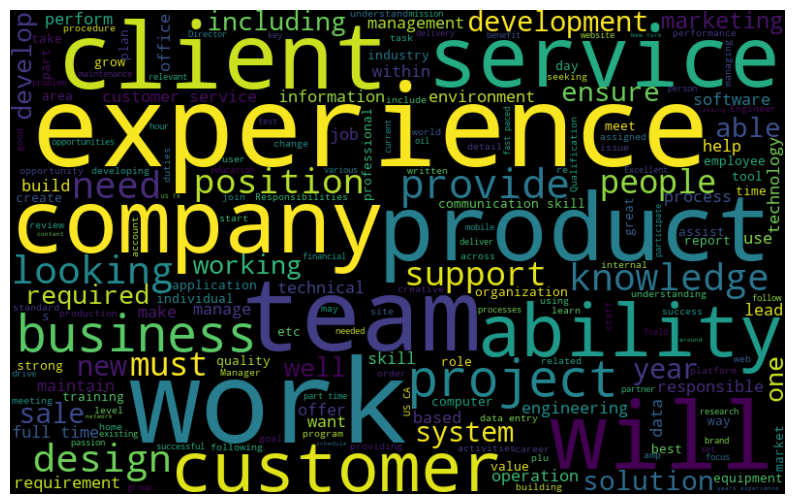

In [27]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
 # Common words in real job posting texts

real_post = ''.join([text for text in data["text"][data['fraudulent']==0]])
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(real_post)


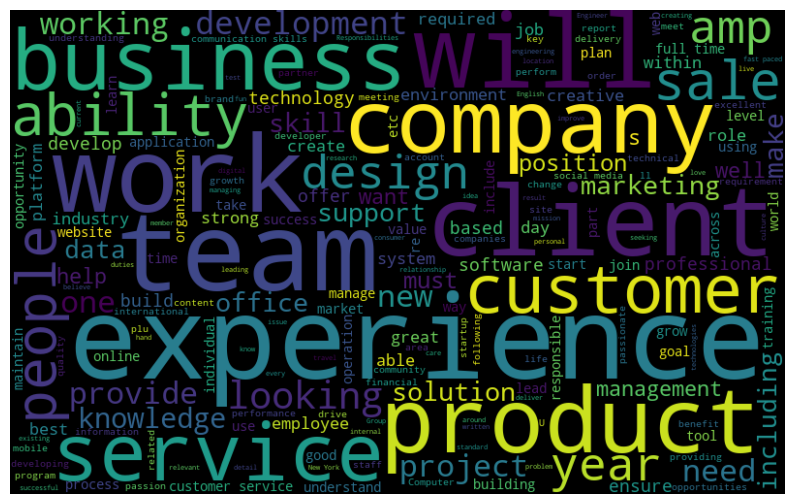

In [29]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
# Common words in fraud job posting texts

fraud_post = ''.join([text for text in data["text"][data['fraudulent'] == 1]])

In [31]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(fraud_post)

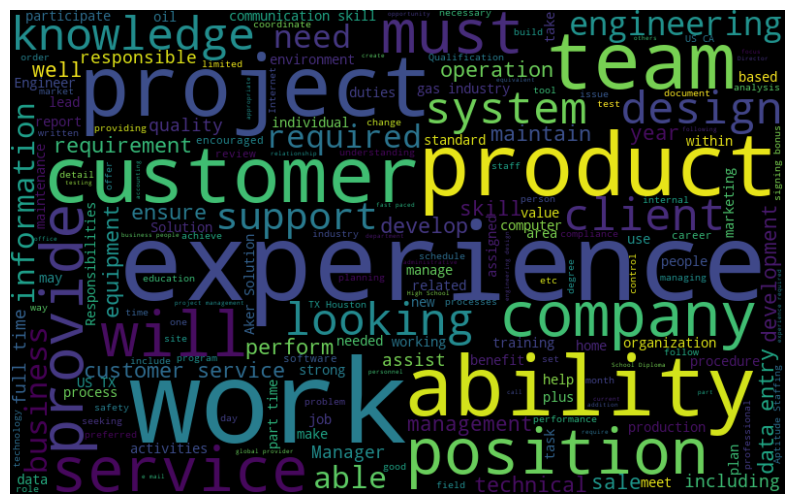

In [32]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Data *Preapration*

In [33]:
# NLTK :: Natural Language Toolkit
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/anurag/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
print(stopwords.words("english"))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [35]:
#loading the stopwords
stop_words = set(stopwords.words("english"))

In [36]:
#converting all the text to lower case
data['text'] = data['text'].apply(lambda x:x.lower())

In [39]:
#removing the stop words from the corpus
data['text'] = data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))

In [43]:
data['text'].iloc[0]

'superstar (store manager) - st. louis galleria us, mo, st. louis ready let star shine? discover career you’ve dreaming avastars where… star inside you! avastars, we’re dedicated making dreams come true creating entertainment retail highly personalized aspirational. we’re currently looking “a” players capitalize lifetime opportunity. senior leadership team known success mattel, pokemon, build-a-bear workshop, leapfrog waterbabies. join us getting “ground floor” development implementation “next big thing” destined change face retail way children play. avastars equal opportunity employer committed providing diverse environment.#url_77edd0eb5baaf205d0de93d32fc2471370b249e83cdfaacc8c0a5f00c51b8e15# ready let star shine? discover career you’ve dreaming avastars where…the star inside you! avastars, we’re dedicated making dreams come true creating entertainment retail highly personalized aspirational. we’re currently looking “a” players capitalize lifetime opportunity. senior leadership team 

In [44]:
from sklearn.model_selection import train_test_split
# Splitting dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(data.text, data.fraudulent, test_size=0.3)

In [45]:
# what does X-train and y_train contain
print(y_train)
print(X_train)

7464     0
10910    1
12866    1
4424     0
5969     1
        ..
9134     1
1020     1
12252    1
989      1
4952     1
Name: fraudulent, Length: 970, dtype: int64
7464     customer service associate us, ny, new york no...
10910    administrative clerk us, , processing letters,...
12866    call center rep us, tx, dallas accion story be...
4424     birmingham fragrance beauty promotional staff ...
5969     well test operator us, tx, houston overall pur...
                               ...                        
9134     senior sales professionals us, in, indianapoli...
1020     cruise staff wanted *urgent* us, ny, manhattan...
12252    cad operator us, tx, houston aker solutions gl...
989      oil/gas technical manager us, tx, houston job ...
4952     hardware/electrical engineer us, tx, houston a...
Name: text, Length: 970, dtype: object


In [46]:
# The model cannot operate text data so we need to convert our data into vector format
# we will be using Bag of words model 
from sklearn.feature_extraction.text import CountVectorizer

#  instantiate the vectorizer
vect = CountVectorizer()

# learn training data vocabulary, then use it to create a document-term matrix
# fit
vect.fit(X_train)

# transform training data
X_train_dtm = vect.transform(X_train)


In [47]:
# examine the document-term matrix
X_train_dtm

#how X_train_dtm is looking
print(X_train_dtm)
# This is Matrix representation,non 0 valued cells are not printed

  (0, 231)	1
  (0, 327)	1
  (0, 536)	1
  (0, 657)	1
  (0, 706)	1
  (0, 722)	1
  (0, 1026)	1
  (0, 1080)	1
  (0, 1436)	1
  (0, 1539)	1
  (0, 1548)	1
  (0, 1550)	1
  (0, 1584)	2
  (0, 1638)	1
  (0, 1645)	1
  (0, 1656)	1
  (0, 1757)	1
  (0, 1816)	1
  (0, 1818)	1
  (0, 1880)	1
  (0, 2102)	1
  (0, 2251)	1
  (0, 2258)	1
  (0, 2432)	3
  (0, 2578)	1
  :	:
  (969, 15456)	1
  (969, 15484)	1
  (969, 15497)	3
  (969, 15566)	4
  (969, 15596)	3
  (969, 15697)	1
  (969, 15852)	2
  (969, 15884)	1
  (969, 16043)	1
  (969, 16153)	1
  (969, 16246)	1
  (969, 16335)	1
  (969, 16506)	2
  (969, 16722)	2
  (969, 16817)	2
  (969, 17261)	1
  (969, 17306)	1
  (969, 17313)	1
  (969, 17318)	1
  (969, 17346)	5
  (969, 17373)	4
  (969, 17398)	2
  (969, 17412)	4
  (969, 17446)	1
  (969, 17468)	1


In [42]:
# PCA is not advisable for a NLP task,because PCA is for 
# principal feature extraction and in this case we already have features

In [48]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<416x17799 sparse matrix of type '<class 'numpy.int64'>'
	with 65820 stored elements in Compressed Sparse Row format>

# Model Building & evaluation

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

<h2>Naive Bayes</h2>

In [53]:
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes Classifier
# We are using Multinomial Naive Bayes because the data here is not symmetrical.
# %time will give the time taken by the system for execution

nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)

CPU times: user 7.3 ms, sys: 0 ns, total: 7.3 ms
Wall time: 7.73 ms


MultinomialNB()

In [54]:
y_pred_nb = nb.predict(X_test_dtm)
print(y_pred_nb)

[1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0
 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0
 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0
 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1
 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0
 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1
 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0
 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 1 1 0 0 1 1 1 1]


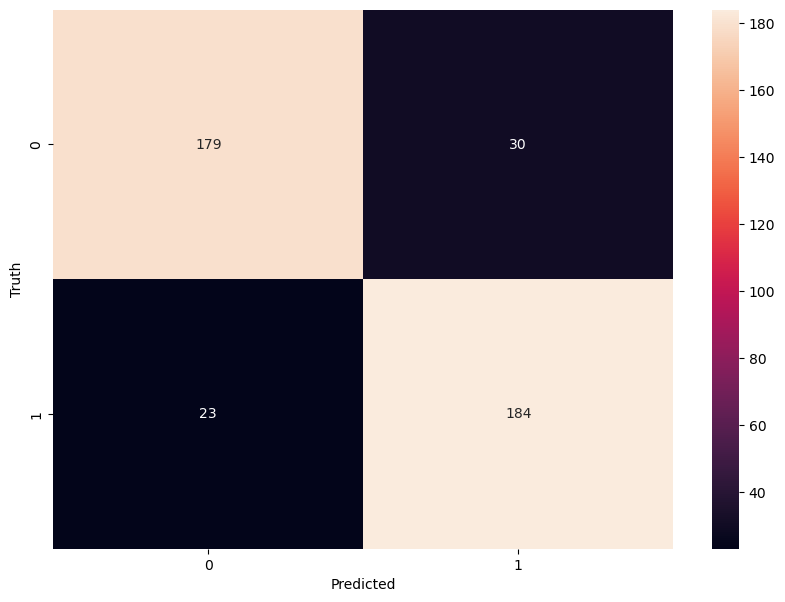

In [56]:
import seaborn as sns  # or `import seaborn as sn` if you prefer to keep `sn`

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')  # use `sns` or `sn` based on your import
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

<h2>Decision Tree Classifier</h2>

In [57]:
#instantiate a Decision Tree Classifier
dt = DecisionTreeClassifier()

In [58]:
#train the model 
# using X_train_dtm (timing it with an IPython "magic command")

%time dt.fit(X_train_dtm, y_train)

CPU times: user 480 ms, sys: 3.75 ms, total: 484 ms
Wall time: 482 ms


DecisionTreeClassifier()

In [59]:
# make class predictions for X_test_dtm
y_pred_class = dt.predict(X_test_dtm)

In [60]:
# Model Accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_pred_class))
print("Classification Report\n")
print(classification_report(y_test, y_pred_class))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_class))



Classification Accuracy: 0.8076923076923077
Classification Report

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       209
           1       0.80      0.82      0.81       207

    accuracy                           0.81       416
   macro avg       0.81      0.81      0.81       416
weighted avg       0.81      0.81      0.81       416

Confusion Matrix

[[166  43]
 [ 37 170]]


Text(95.72222222222221, 0.5, 'Truth')

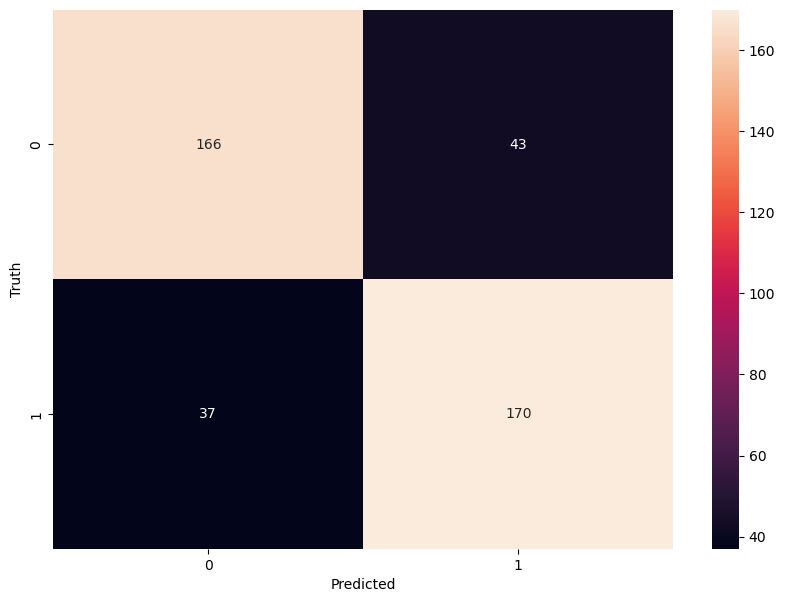

In [61]:
# Confusion Matrix

import seaborn as sn
cm = confusion_matrix(y_test,y_pred_class)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Building a Predictive System

In [62]:
#Lets Predict for a data set
X_test

12693    admin assistant us, md, baltimore job descript...
8196     head marketing dk, 84, copenhagen tradable's a...
12342    lead instructor: ios development ca us:bitmake...
8095     studio sr. visual designer us, ca, manhattan b...
8454     operations manager food52, created groundbreak...
                               ...                        
12078    inbound customer service representative nz, n,...
8023     administrative assistant us, tx, dallas azco i...
3168     urgent requirement : sr help desk /technical s...
3631     receptionist/office clerk us, oh, columbus exp...
3245     position finance assistant au, nsw, sydney dut...
Name: text, Length: 416, dtype: object

In [65]:
print(X_test.index)  # Shows actual index labels

Index([12693,  8196, 12342,  8095,  8454,  9322,  4284,  7085,  3708,  2721,
       ...
        4205,  9152,  5844,   207, 13361, 12078,  8023,  3168,  3631,  3245],
      dtype='int64', length=416)


In [66]:
input_text=["customer service associate us, ca, san francisco novitex enterprise solutions, formerly pitney bowes management services, delivers innovative document communications management solutions help companies around world drive business process efficiencies, increase productivity, reduce costs improve customer satisfaction. almost 30 years, clients turned us integrate optimize enterprise-wide business processes empower employees, increase productivity maximize results. trusted partner, continually focus delivering secure, technology-enabled document communications solutions improve clients' work processes, enhance customer interactions drive growth. customer service associate based san francisco, ca. right candidate integral part talented team, supporting continued growth.responsibilities:perform various mail center activities (sorting, metering, folding, inserting, delivery, pickup, etc.)lift heavy boxes, files paper neededmaintain highest levels customer care demonstrating friendly cooperative attitudedemonstrate flexibility satisfying customer demands high volume, production environmentconsistently adhere business procedure guidelinesadhere safety procedurestake direction supervisor site managermaintain logs reporting documentation; attention detailparticipate cross-training perform duties assigned (filing, outgoing shipments, etc)operating mailing, copy scanning equipmentshipping &amp; receivinghandle time-sensitive material like confidential, urgent packagesperform tasks assignedscanning incoming mail recipientsperform file purges pullscreate files ship filesprovide backfill neededenter information daily spreadsheetsidentify charges match billingsort deliver mail, small packages minimum requirements:minimum 6 months customer service related experience requiredhigh school diploma equivalent (ged) requiredpreferred qualifications:keyboarding windows environment pc skills required (word, excel powerpoint preferred)experience running mail posting equipment plusexcellent communication skills verbal writtenlifting 55 lbs without accommodationswillingness availability work additional hours assignedwillingness submit pre-employment drug screening criminal background checkability effectively work individually team environmentcompetency performing multiple functional tasksability meet employer's attendance policy computer software"]

In [67]:
# convert text to feature vectors
input_data_features = vect.transform(input_text)

# making prediction

prediction = dt.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Fraudulant Job')

else:
  print('Real Job')

[0]
Real Job


In [71]:
print("Predicted:", y_pred_nb[100])
print("Actual:   ", y_test.iloc[100])

Predicted: 1
Actual:    1


Thus the predicted result was correct.